# Ecommerce
## Describe:
**This is an ecommerce business but also have consulting sessions. The clients go to the store, meets personal stylist and go home to buy using an app or a website. The company wanna know if the website or app is better to invest**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Data Collection Goals
    
<input type="checkbox"> AVG Session Lenght (in consulting)  
<input type="checkbox"> Time on App (in minutes)  
<input type="checkbox"> Time on Website (in minutes)  
<input type="checkbox"> Lenght of Membership (how many years)  



In [2]:
file = "//home//vinicius//Data_Science//Notebooks//Data_Files//Ecommerce Customers"

df1 = pd.read_csv(file)
df1.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df1.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Create new df without object datas

In [5]:
columns = list(df1.columns)
columns = [e for e in columns if e not in ('Address', 'Email','Avatar')]
df2= df1[columns]
df2.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


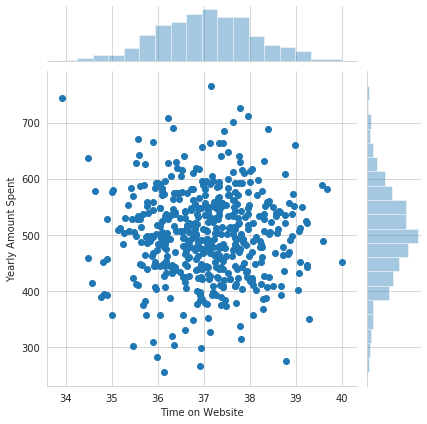

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df2)

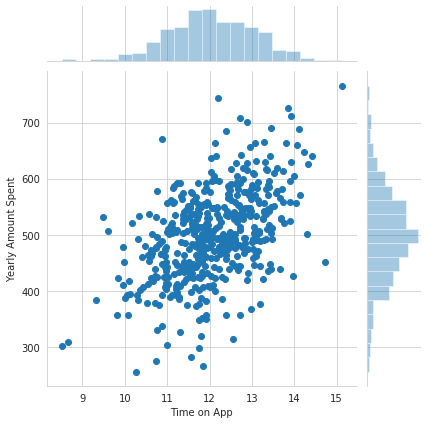

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df2) ## app spends seens more linear than site

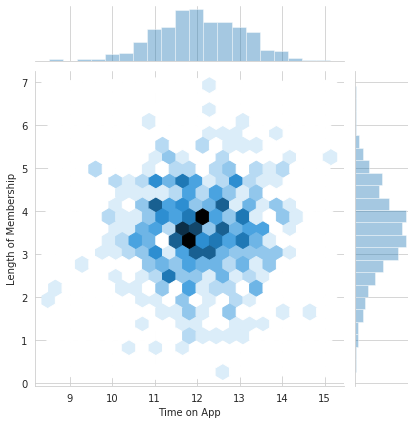

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership', kind='hex',data=df2)

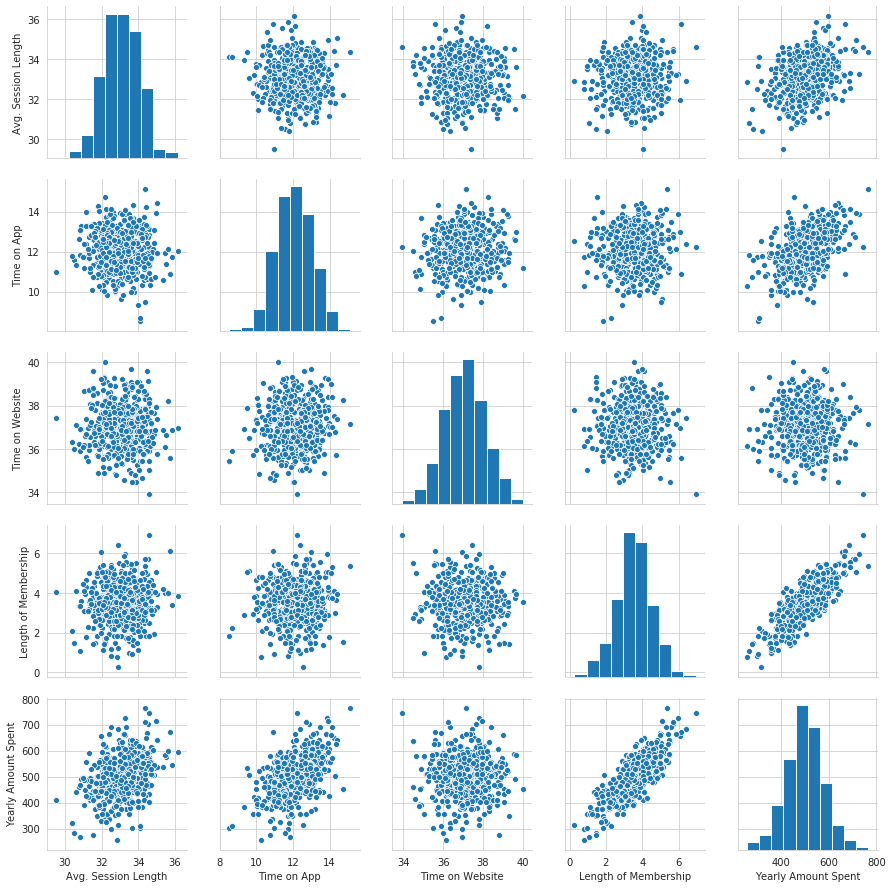

In [9]:
sns.pairplot(df2) ## length of membership vs year waste looks good

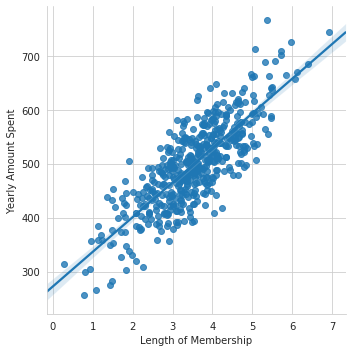

In [10]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df2)

In [11]:
columns = list(df2.columns)
columns.remove('Yearly Amount Spent')

x = df2[columns]
y = df2['Yearly Amount Spent']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(x_train,y_train)
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [16]:
predict = lm.predict(x_test)

[Text(0, 0.5, 'predict'), Text(0.5, 0, 'Y test')]

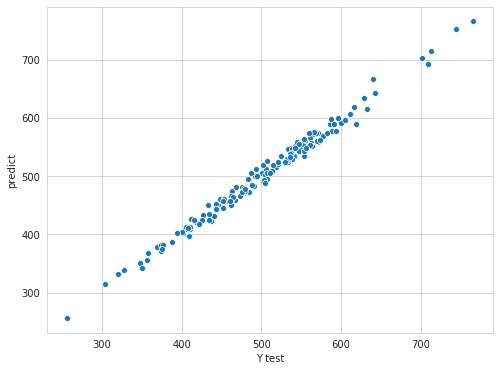

In [17]:
## Scatter y_test by predict
plt.figure(figsize=(8,6))
ax = sns.scatterplot(y_test,predict)
ax.set(xlabel='Y test', ylabel='predict')

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test,predict))
print('MSE:', metrics.mean_squared_error(y_test,predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predict)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


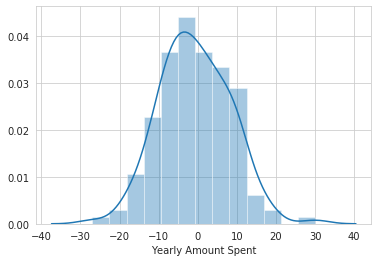

In [19]:
sns.distplot(y_test-predict) ## looks like a normal, ok

In [20]:
coef = pd.DataFrame(lm.coef_, x.columns, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# Conclusion 

1. **Increase 1 unity at Session Time, increases 26USD on users spents**
2. **INcrease 1 unity at Time on App increase 38,5USD on users spents**
3. **Increase 1 unity at Time on Web increase less than 1USD on users spents**
4. **Increase 1 unity at Membership Time increase 61USD on users spents**

**If the company find a way to build customers loyalt probably will earn more**  
**About the app and the site, the company should focus on App because:**  
- **1 minute at app equals to 38USD**  
- **1 minute at site equals to 0.19USD**